In [1]:
from hestonpy.models.heston import Heston

import matplotlib.pyplot as plt 
import time
import numpy as np

# Initialisation of the model

In [2]:
S0 = 100
V0 = 0.06
r = 0.05
kappa = 1
theta = 0.06
drift_emm = 0.01 
sigma = 0.3
rho = -0.5
T = 1
K = 100

heston = Heston(S0, V0, r, kappa, theta, drift_emm, sigma, rho, T, K)

### Price via Monte Carlo

Parameters

In [3]:
n = 100
N = 10**3

Via Euler-Maruyama scheme

In [4]:
start_time = time.time()
result = heston.monte_carlo_price(scheme="euler", n=n, N=N)
time_delta = round(time.time() - start_time,4)
price_euler = round(result.price, 2)
std_euler = round(result.std, 2)
infinum_euler = round(result.infinum, 2)
supremum_euler = round(result.supremum, 2)
print(f"Monte Carlo Euler scheme in {time_delta}s : price ${price_euler}, std {std_euler}, and Confidence interval [{infinum_euler},{supremum_euler}]\n")

Variance has been null 0 times over the 100000 iterations (0.0%) 
Monte Carlo Euler scheme in 0.0667s : price $12.05, std 0.49, and Confidence interval [12.01,12.09]



Via Milstein scheme

In [5]:
start_time = time.time()
result = heston.monte_carlo_price(scheme="milstein", n=n, N=N)
time_delta = round(time.time() - start_time,4)
price_milstein = round(result.price, 2)
std_milstein = round(result.std, 2)
infinum_milstein = round(result.infinum, 2)
supremum_milstein = round(result.supremum, 2)
print(f"Monte Carlo Milstein scheme in {time_delta}s : price ${price_milstein}, std {std_milstein}, and Confidence interval [{infinum_milstein},{supremum_milstein}]\n")

Variance has been null 0 times over the 100000 iterations (0.0%) 
Monte Carlo Milstein scheme in 0.0633s : price $12.02, std 0.49, and Confidence interval [11.97,12.06]



### Price via Fourier Transform

In [6]:
start_time = time.time()
price_FT, error_FT = heston.fourier_transform_price()
time_delta = round(time.time() - start_time,4)
infinum = round(price_FT-error_FT, 2)
supremum = round(price_FT+error_FT, 2)
price_FT = round(price_FT, 2)
error_FT = round(error_FT, 8)
print(f"Fourier Transform in {time_delta}s : price ${price_FT}, error ${error_FT} , and Confidence interval [{infinum},{supremum}]\n")

Fourier Transform in 0.2318s : price $11.94, error $1.8e-07 , and Confidence interval [11.94,11.94]



### Price via Carr-Madan formula 

In [7]:
start_time = time.time()
price_CM, error_CM = heston.carr_madan_price()
time_delta = round(time.time() - start_time,4)
infinum = round(price_CM-error_CM, 2)
supremum = round(price_CM+error_CM, 2)
price_CM = round(price_CM, 2)
error_CM = round(error_CM, 14)
print(f"Carr-Madan in {time_delta}s : price ${price_CM}, error ${error_CM} , and Confidence interval [{infinum},{supremum}]\n")

Carr-Madan in 0.0983s : price $11.94, error $3.8e-13 , and Confidence interval [11.94,11.94]



### Path simulations

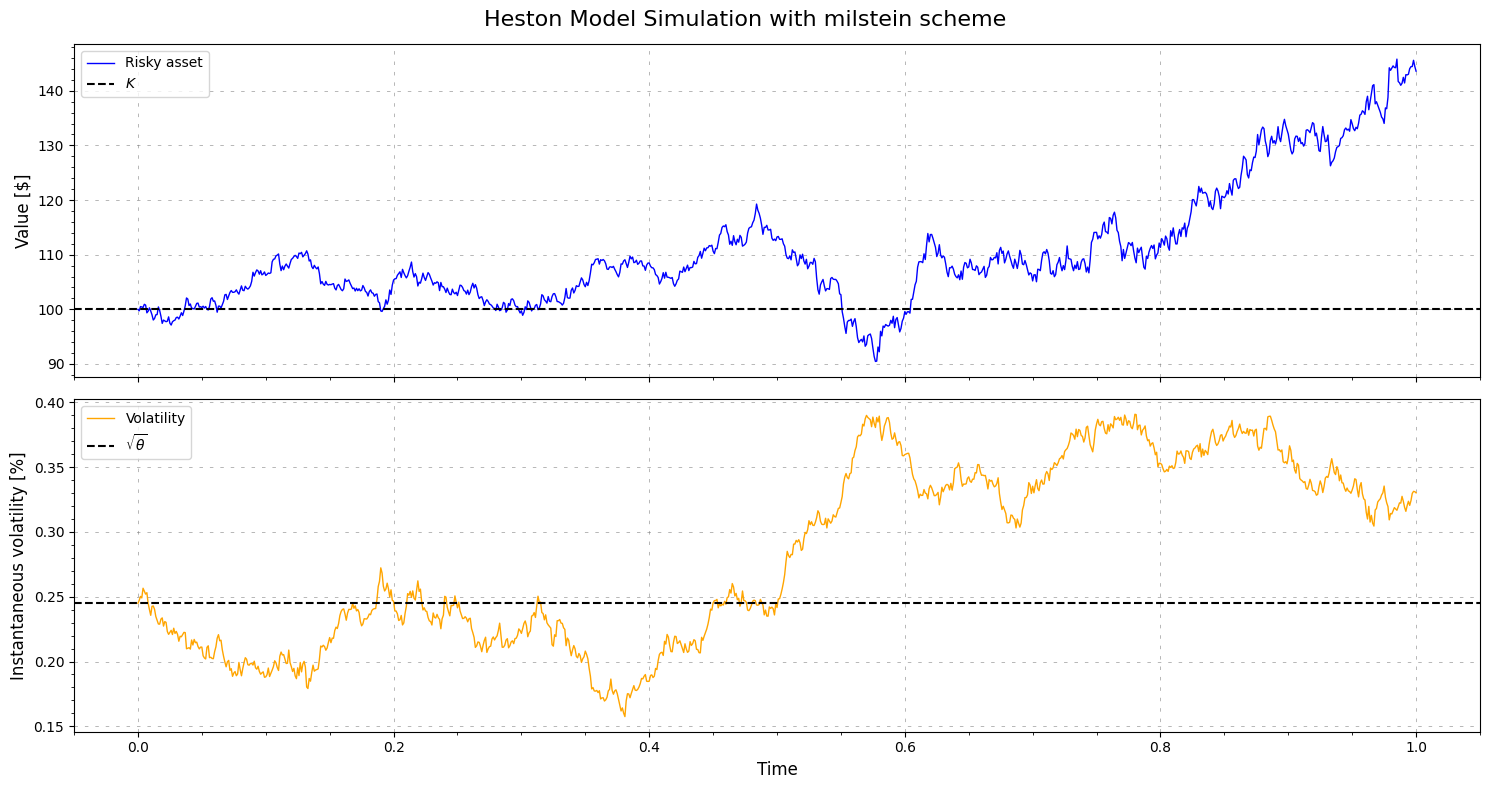

In [10]:
scheme = 'milstein'
S, V = heston.plot_simulation(scheme)

# Characteristic function

In [11]:
psi1 = heston.characteristic(j=1)
psi2 = heston.characteristic(j=2)

u = np.arange(start=-20, stop=20,step=0.01)

x = np.log(S0)
v = V0
t = T - 1 

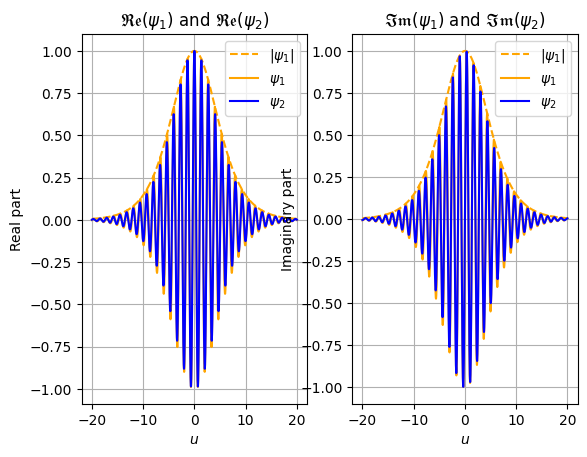

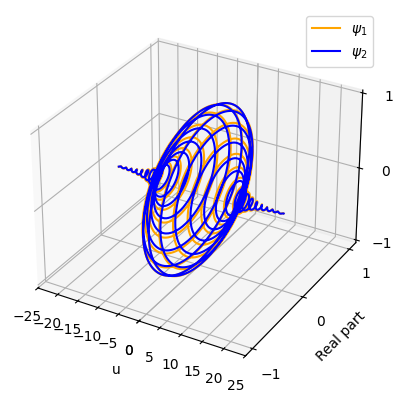

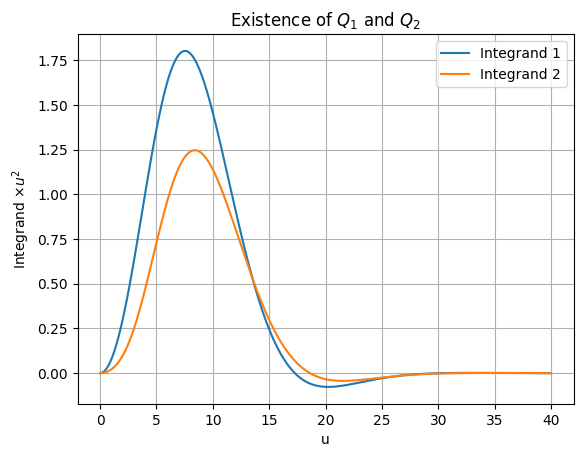

In [12]:
# 2D plot
# Create subplots for real and imaginary parts
plt.figure()

# Plot real part of psi1 and psi2
plt.subplot(1, 2, 1)
plt.title(r'$\mathfrak{Re}(\psi_1)$ and $\mathfrak{Re}(\psi_2)$')
plt.plot(u, np.abs(psi1(x, v, t, u)), label=r'$|\psi_1|$', color='orange', linestyle='--')
plt.plot(u, psi1(x, v, t, u).real, label=r'$\psi_1$', color='orange')
plt.plot(u, psi2(x, v, t, u).real, label=r'$\psi_2$', color='blue')
plt.grid(visible=True)
plt.xlabel(r'$u$')
plt.ylabel('Real part')
plt.legend()

# Plot imaginary part of psi1 and psi2
plt.subplot(1, 2, 2)
plt.title(r'$\mathfrak{Im}(\psi_1)$ and $\mathfrak{Im}(\psi_2)$')
plt.plot(u, np.abs(psi1(x, v, t, u)), label=r'$|\psi_1|$', color='orange', linestyle='--')
plt.plot(u, psi1(x, v, t, u).imag, label=r'$\psi_1$', color='orange')
plt.plot(u, psi2(x, v, t, u).imag, label=r'$\psi_2$', color='blue')
plt.grid(visible=True)
plt.xlabel(r'$u$')
plt.ylabel('Imaginary part')
plt.legend()

#plt.tight_layout()
plt.show() 


# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(u, psi1(x, v, t, u).real, psi1(x, v, t, u).imag, label=r'$\psi_1$', color='orange')
ax.plot(u, psi2(x, v, t, u).real, psi2(x, v, t, u).imag, label=r'$\psi_2$', color='blue')
ax.set_xticks([-5*i for i in range(6)] + [5*i for i in range(6)])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlabel('u')
ax.set_ylabel('Real part')
ax.set_zlabel('Imaginary part')
plt.legend()
plt.show()

## Integration over R_+
psi1 = heston.characteristic(j=1)
integrand1 = lambda u : np.real((np.exp(-u * np.log(heston.K) * 1j) * psi1(x, v, t, u))/(u*1j)) 
psi2 = heston.characteristic(j=2)
integrand2 = lambda u : np.real((np.exp(-u * np.log(heston.K) * 1j) * psi2(x, v, t, u))/(u*1j)) 

u = np.arange(start=0, stop=40,step=0.01)

plt.figure()
plt.plot(u, integrand1(u) * u**2, label="Integrand 1")
plt.plot(u, integrand2(u) * u**2, label="Integrand 2")
plt.xlabel(r'u')
plt.ylabel(r'Integrand $\times u^2$')
plt.legend()
plt.grid(visible=True)
plt.title(r'Existence of $Q_1$ and $Q_2$')
plt.show()